In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df['cholesterol'] = [1 if i > 1 else 0 for i in df['cholesterol']]
df['gluc'] = [1 if i > 1 else 0 for i in df['gluc']]

In [4]:
 df['overweight'] = [1 if i > 25 else 0 for i in df['weight'] / ((df['height'] / 100) ** 2)]
df['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

SEMPRE EXECUTAR TUDO ACIMA DESSA CÉLULA

In [16]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [3]:
df.info

<bound method DataFrame.info of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       

In [4]:
df.head

<bound method NDFrame.head of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       sm

In [5]:
df.index

RangeIndex(start=0, stop=70000, step=1)

In [6]:
df['weight']

0         62.0
1         85.0
2         64.0
3         82.0
4         56.0
         ...  
69995     76.0
69996    126.0
69997    105.0
69998     72.0
69999     72.0
Name: weight, Length: 70000, dtype: float64

In [7]:
df['cholesterol']

0        1
1        3
2        3
3        1
4        1
        ..
69995    1
69996    2
69997    3
69998    1
69999    2
Name: cholesterol, Length: 70000, dtype: int64

In [9]:
df['gluc']

0        1
1        1
2        1
3        1
4        1
        ..
69995    1
69996    2
69997    1
69998    2
69999    1
Name: gluc, Length: 70000, dtype: int64

In [5]:
df['height']

0        168
1        156
2        165
3        169
4        156
        ... 
69995    168
69996    158
69997    183
69998    163
69999    170
Name: height, Length: 70000, dtype: int64

In [6]:
BMI = df['weight'] / ((df['height'] / 100) ** 2)
BMI

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Length: 70000, dtype: float64

In [7]:
o = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])
o

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


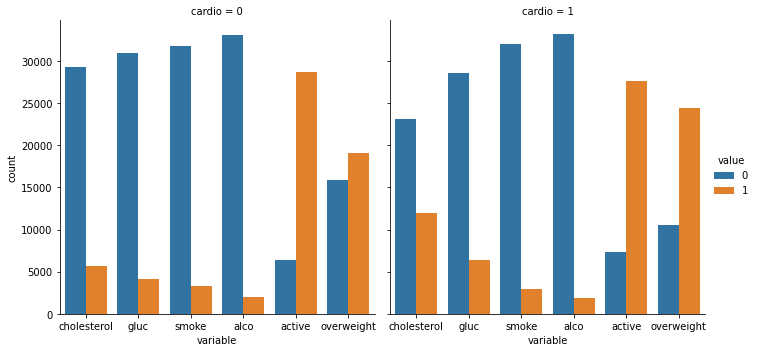

In [32]:
sns.catplot(x="variable", col="cardio",
                data=o, kind="count", hue="value")

In [10]:
df['ap_lo']

0         80
1         90
2         70
3        100
4         60
        ... 
69995     80
69996     90
69997     90
69998     80
69999     80
Name: ap_lo, Length: 70000, dtype: int64

In [11]:
df['ap_hi']

0        110
1        140
2        130
3        150
4        100
        ... 
69995    120
69996    140
69997    180
69998    135
69999    120
Name: ap_hi, Length: 70000, dtype: int64

In [25]:
df['height']

0        168
1        156
2        165
3        169
4        156
        ... 
69995    168
69996    158
69997    183
69998    163
69999    170
Name: height, Length: 68766, dtype: int64

In [43]:
(df['height'] >= df['height'].quantile(0.025)).sum()

KeyError: 'height'

In [33]:
df.shape

(68766,)

In [42]:
df['height'] <= df['height'].quantile(0.975)

KeyError: 'height'

In [5]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'overweight'],
      dtype='object')

In [5]:
    df.loc[(df['ap_lo'] <= df['ap_hi']) &
           (df['height'] >= df['height'].quantile(0.025)) &
           (df['height'] <= df['height'].quantile(0.975)) &
           (df['weight'] >= df['weight'].quantile(0.025)) &
           (df['weight'] >= df['weight'].quantile(0.975))]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
15,24,16782,2,172,112.0,120,80,0,0,0,0,0,1,1
83,114,19570,1,152,110.0,160,90,0,0,0,0,1,1,1
196,267,22675,1,176,108.0,140,90,0,0,0,0,0,0,1
267,366,17460,1,165,115.0,150,100,0,0,0,0,1,1,1
286,390,22510,2,170,115.0,120,80,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69668,99507,14925,1,170,111.0,160,90,1,0,0,1,0,1,1
69699,99553,23183,2,178,113.0,130,90,1,1,1,0,1,1,1
69946,99925,21333,1,164,115.0,130,80,0,0,0,0,1,1,1
69947,99930,23305,2,172,113.0,110,80,0,0,0,0,0,1,1


<AxesSubplot:>

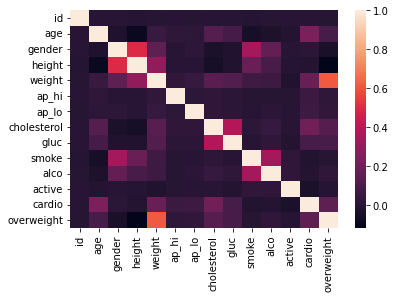

In [12]:
sns.heatmap(corr)

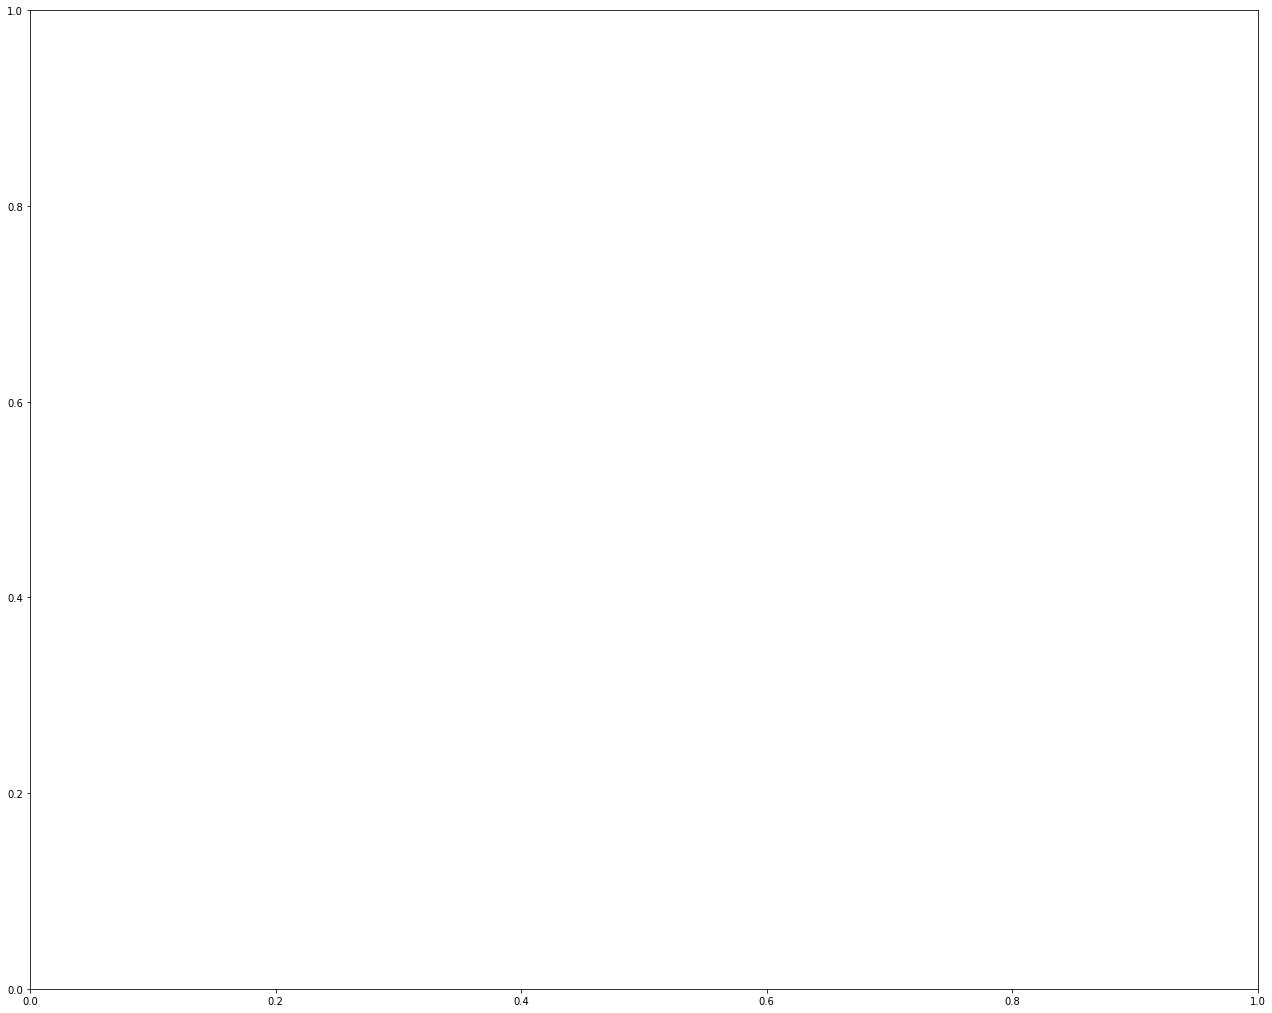

In [9]:
fig, ax = plt.subplots(figsize=(22, 18))

In [ ]:
plt.show()

In [7]:
corr = df.corr()